<a href="https://colab.research.google.com/github/rs2pydev/pythonic_topics/blob/main/Feature_Selection_for_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# __COMMONLY USED FEATURE SELECTION TECHNIQUES FOR MACHINE LEARNING__


## **0. REFERENCES**

<font size="2.0"><b>This tutorial is based on the following articles</font>
<ul>
<li><b><font size="2.0"><a href="https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e">Feature Selection Techniques in Machine Learning with Python</a></font></b></li>
<li><b><font size="2.0"><a href="https://towardsdatascience.com/types-of-correlation-coefficients-db5aa9ea8fd2">Types of Correlation Coefficients</a></font></b></li>
<li><b><font size="2.0"><a href="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3576830/">A guide to appropriate use of Correlation coefficient in medical research</a></font></b></li>
<li><b><font size="2.0"><a href="https://towardsdatascience.com/kendall-rank-correlation-explained-dee01d99c535">Kendall Rank Correlation Explained</a></font></b></li>
<li><b><font size="2.0"><a href="https://journals.lww.com/anesthesia-analgesia/fulltext/2018/05000/correlation_coefficients__appropriate_use_and.50.aspx">Correlation Coefficients: Appropriate Use and Interpretation</a></font></b></li>
</ul>

## **1. FEATURE SELECTION OVERVIEW**

### **1.1 WHAT IS FEATURE SELECTION?**

* Feature selection can be defined as an automated or manual process using which we can choose the "best" (optimal) features that contribute the most towards the prediction of the output variable, i.e., they influence the prediction algorithm significantly.

* We can alternatively define feature selection as the manual or automated process with which we can remove irrelevant or redundant features from a data set. 

* Since feature selection reduces the number of available features in a given data set, it helps to overcome the **curse of dimensionality** to some extent. **Curse of dimensionality** is the problem faced by many machine learning model wherein, their performance is poor on a high-dimensional data set. 

### **1.2 ADVANTAGES OF FEATURE SELECTION**

* **Reduce overfitting:** Lesser redundant data implies lesser noise and therefore, lesser chance of model overfitting.
    
* **Increase model interpretibility:** Lesser features makes a model easier to  understand.
    
* **Improve model performance:** Less irrelevant data means higher model performance.
    
* **Reduce computational cost:** Models built with less number of features ensures that they run faster as well as require less resources.
    
* **Reduces cost associated with data collection:** Lesser number of features implies less efforts (cost) of data collection.

## **2. TUTORIAL OBJECTIVE**

The objective of this tutorial is to illustrate three following techniques that are commonly used for selecting features. These techniques are easy to use and also gives good results:

* **Univariate Selection**

* **Feature Importance**

* **Correlation matrix with heatmap**

## **3. DATASET DESCRIPTION**

### **3.1 BACKGROUND**

A man named Bob who has started his own mobile company, wants to give a tough fight to big companies like Apple, Samsung, and others. However, he does not know how to estimate the price of the mobiles that his company produces and in this competitive mobile phone market, one cannot simply reply on assumptions. 

To solve his problem, Bob collects sales data of mobile phones of various companies in an effort to find if there exists some relationship between features of a mobile phone like, RAM, Internal Memory, etc., and its selling price. As he is not so good at Machine Learning, Bob hires you for this job!

### **3.2 PROBLEM STATEMENT**

Your task is to predict a price range, indicating how high the selling price of a mobile is, based on its features. Note that, this is a multiclass classification problem.

### **3.2 ATTRIBUTES AND THEIR DESCRIPTIONS**

1. **battery_power:** Total energy a battery can store in one time measured in mAh 
2. **blue:** Has Bluetooth or not 
3. **clock_speed:** The speed at which microprocessor executes instructions 
4. **dual_sim:** Has dual sim support or not 
5. **fc:** Front Camera megapixels 
6. **four_g:** Has 4G or not 
7. **int_memory:** Internal Memory in Gigabytes 
8. **m_dep:** Mobile Depth in cm 
9. **mobile_wt:** Weight of mobile phone 
10. **n_cores:** Number of cores of the processor 
11. **pc:** Primary Camera megapixels  
12. **px_height:** Pixel Resolution Height  
13. **px_width:** Pixel Resolution Width 
14. **ram:** Random Access Memory in MegaBytes 
15. **sc_h:** Screen Height of mobile in cm 
16. **sc_w:** Screen Width of mobile in cm 
17. **talk_time** The longest time that a single battery charge will last when you are 
18. **three_g:** Has 3G or not 
19. **touch_screen:** Has touch screen or not  
20. **wifi:** Has wifi or not 
21. **price_range:** This is the target variable with following values:
    * $0$ (low cost)
    * $1$ (medium cost)
    * $2$(high cost) 
    * $3$ (very high cost) 

## **4. IMPORTS AND ASSOCIATED OPERATIONS**

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import sklearn as skl

In [2]:
print(f'numpy version: {np.__version__:s}')
print(f'pandas version: {pd.__version__:s}')
print(f'matplotlib version: {mpl.__version__:s}')
print(f'seaborn version: {sns.__version__:s}')
print(f'sklearn version: {skl.__version__:s}')

numpy version: 1.21.6
pandas version: 1.3.5
matplotlib version: 3.2.2
seaborn version: 0.11.2
sklearn version: 1.0.2


In [3]:
from matplotlib import pyplot as plt

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier

In [4]:
def draw_line():
    return print('***' * 20)

## **5. LOADING DATASET AS PANDAS DATAFRAME**

In [5]:
data_url = "https://raw.githubusercontent.com/rs2pydev/datasets/main/\
mobille_price_classification/train.csv"

df = pd.read_csv(data_url)

In [6]:
draw_line()
print("Num. of rows and columns in data set:\n") 
draw_line()
print(*df.shape, sep=", ") # `*` indicates tuple unpacking 

************************************************************
Num. of rows and columns in data set:

************************************************************
2000, 21


In [7]:
draw_line()
print('First couple of rows of the data set:')
draw_line()
df.head()

************************************************************
First couple of rows of the data set:
************************************************************


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [8]:
draw_line()
print('Last couple of rows of the data set:')
draw_line()
df.tail()

************************************************************
Last couple of rows of the data set:
************************************************************


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [9]:
X = df.iloc[:, :20] # Create the feature matrix  
y = df.iloc[:, -1] # Create the target vector

In [10]:
print(f"X.shape: {X.shape}\n")
print(f"y.shape: {y.shape}\n")

X.shape: (2000, 20)

y.shape: (2000,)



## **5. UNIVARIATE SELECTION**


* Statistical tests can be used to select all those input variables (features) that have the strongest relationship with the output (target) variable. *Note, more stronger the relationship between a feature and the output variable, the more is the predictive capacity of the feature.*

* The Scikit-Learn library's `feature_selection` module provides a class called `SelectKBest` that can be used with a suite of statistical tests for selecting a specific number of features.

* In the example given below, we use the $\chi^{2}$-test (chi-squared test) for non-negative features, and select $10$ of the best features from [Mobile Price Classification](https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification?resource=download) data set.

In [11]:
############################################################
# Apply Scikit-Learn's `SelectKBest()` class to extract
# the top 10 features
############################################################

best_feats = SelectKBest(score_func=chi2, k=10)
fit_obj = best_feats.fit(X, y)

In [12]:
df_scores = pd.DataFrame(fit_obj.scores_)
df_columns = pd.DataFrame(X.columns)

# Concat the two dataframes for a better visualization

df_scores = pd.concat([df_columns, df_scores], axis=1)
df_scores.columns = ['Feature', 'chi^2 value']

print('Top 10 features:\n', df_scores.nlargest(10, 'chi^2 value'))

Top 10 features:
           Feature    chi^2 value
13            ram  931267.519053
11      px_height   17363.569536
0   battery_power   14129.866576
12       px_width    9810.586750
8       mobile_wt      95.972863
6      int_memory      89.839124
15           sc_w      16.480319
16      talk_time      13.236400
4              fc      10.135166
14           sc_h       9.614878


## **6. FEATURE IMPORTANCE**

* To get the importance of each feature of our dataset, we can use the **feature importance** property of our model in consideration.

* The property of **feature importance** provides a score for each feature present in the dataset under consideration such that more important or relevant features have higher scores.

* **Feature importance** comes as an inbuilt class with tree-based classifiers. In this example, we will use the following tree-based classifiers for extracting the top $10$ features for the [Mobile Price Classification](https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification?resource=download) dataset. We will then compare the outputs of the tree-based classifiers to find the common "highest" features. We do this because different models (algorithms) choose features differently and therefore it is not a good idea to focus on only one algorithm to determine **feature importance**.
    * **Decision Tree Classifier**
    * **Random Forest Classifier**
    * **Extra Trees Classifier** 

************************************************************
First couple of rows of data set:
************************************************************
               DT Score
battery_power  0.101982
blue           0.002333
clock_speed    0.001383
dual_sim       0.000667
fc             0.002911



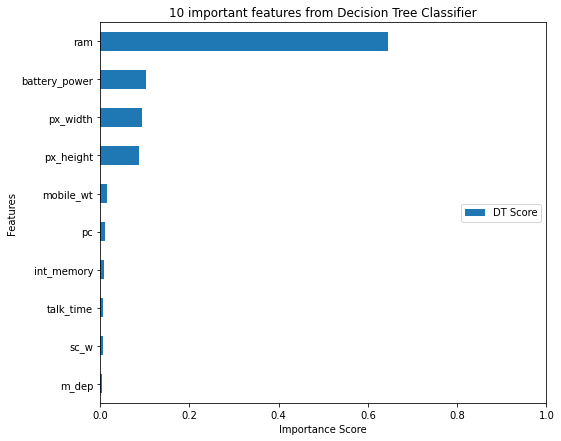

In [13]:
dt = DecisionTreeClassifier() # Instantiating the Decision Tree Classifier

dt.fit(X, y)
imp_feats_dt = pd.DataFrame(dt.feature_importances_, \
                      index=X.columns, columns=['DT Score'])

draw_line()
print('First couple of rows of data set:')
draw_line()
print(imp_feats_dt.head())
print()

imp_feats_dt = imp_feats_dt.sort_values(by='DT Score', ascending=False)
imp_feats_dt_10 = imp_feats_dt.nlargest(10, columns='DT Score')
imp_feats_dt_10.sort_values(by='DT Score', ascending=True).\
plot(kind='barh', figsize=(8,7))
plt.xlim(0.0, 1.0, 0.2)
plt.legend(loc='center right')
plt.title('10 important features from Decision Tree Classifier')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show();

************************************************************
First couple of rows of data set:
************************************************************
               RF Score
battery_power  0.073216
blue           0.006811
clock_speed    0.026376
dual_sim       0.006795
fc             0.024422



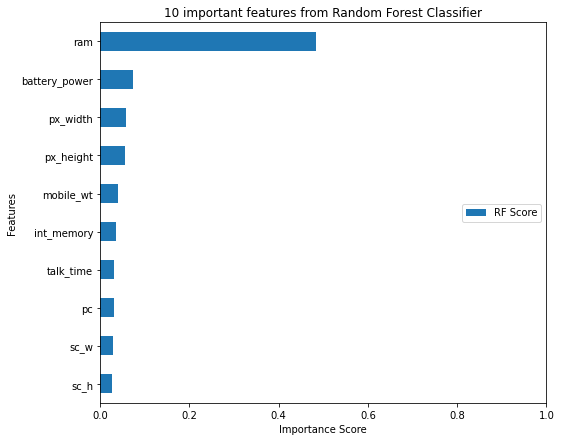

In [14]:
rf = RandomForestClassifier() # Instantiating the Random Forest Classifier

rf.fit(X, y)
imp_feats_rf = pd.DataFrame(rf.feature_importances_, index=X.columns, \
                    columns=['RF Score'])

draw_line()
print('First couple of rows of data set:')
draw_line()
print(imp_feats_rf.head())
print()

imp_feats_rf = imp_feats_rf.sort_values(by='RF Score', ascending=False)
imp_feats_rf_10 = imp_feats_rf.nlargest(10, columns='RF Score')
imp_feats_rf_10.sort_values(by='RF Score', ascending=True).\
plot(kind='barh', figsize=(8,7))
plt.xlim(0.0, 1.0, 0.2)
plt.legend(loc='center right')
plt.title('10 important features from Random Forest Classifier')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show();

************************************************************
First couple of rows of data set:
************************************************************
               ET Score
battery_power  0.063342
blue           0.019879
clock_speed    0.032016
dual_sim       0.019092
fc             0.031708



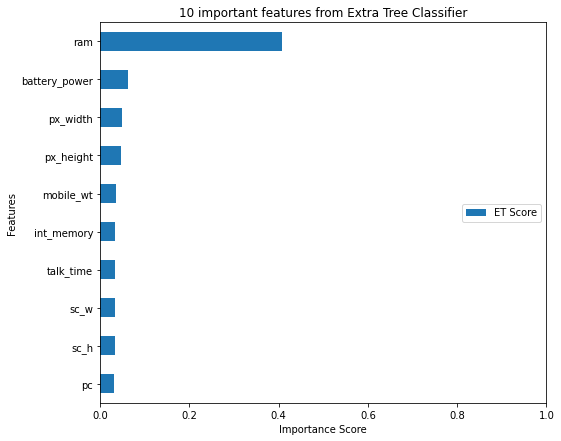

In [15]:
et = ExtraTreesClassifier() # Instantiating the Extra Trees Classifier
et.fit(X, y)

imp_feats_et = pd.DataFrame(et.feature_importances_, index=X.columns, \
                    columns=['ET Score'])

draw_line()
print('First couple of rows of data set:')
draw_line()
print(imp_feats_et.head())
print()

imp_feats_et = imp_feats_et.sort_values(by='ET Score', ascending=False)
imp_feats_et_10 = imp_feats_et.nlargest(10, columns='ET Score')
imp_feats_et_10.sort_values(by='ET Score', ascending=True).\
plot(kind='barh', figsize=(8,7))
plt.xlim(0.0, 1.0, 0.2)
plt.legend(loc='center right')
plt.title('10 important features from Extra Tree Classifier')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show();

## **7. CORRELATION MATRIX WITH HEATMAP**


* The term [**correlation**](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3576830/) is used to refer to an association, connection, or any form of relationship, link or correspondence between two objects.

* In statistics, **correlation** is defined as a method to assess a possible two-way linear association between two continuous [variables](https://scholar.google.com/scholar_lookup?title=Practical+Statistics+for+Medical+Research&author=DG+Altman&). 
* **Correlation** is measured by a statistic called the **correlation coefficient**, which represents the strength of the linear association between the variables in question. It is a dimensionless quantity whose value lies in the range [$[-1, +1]$](https://scholar.google.com/scholar_lookup?title=Statistics+at+square+one&author=TDV+Swinscow&).  
    * A correlation coefficient of $0$ indicates that there is no linear relationship between two continuous variables. 
    * A correlation coefficient of $−1$ or $+1$ indicates a perfect linear relationship. 
    * A positive coefficient indicates that the variables are directly related, i.e., as the value of one variable goes up, the value of the other also tends to do so. 
    * A negative coefficient indicates that the variables are inversely related, i.e., as the value of one variable goes up, the value of the other tends to go down). 

<figure>
<img src="https://miro.medium.com/max/1400/1*n-RxpF8nYzQtJWp1SV8fBQ.png" width="70%">
<figcaption>
<a href="https://towardsdatascience.com/types-of-correlation-coefficients-db5aa9ea8fd2"><font size="2.0"><b>Image Source: Types of Correlation Coefficients</b></a>
</figcaption>
</figure>

* **Table 1: [Rule of Thumb for Interpreting the Size of a Correlation](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3576830/)**
<hr border="0.75px solid gray">
<table>
<tr>
<th>Coefficient</th>
<th>Size of Correlation	Interpretation</th>
</tr>
<tr>
<td>.90 to 1.00 (−.90 to −1.00)</td>
<td>Very high positive (negative) correlation</td>
</tr>
<tr>
<td>.70 to .90 (−.70 to −.90)</td>
<td>High positive (negative) correlation</td>
</tr>
<tr>
<td>.50 to .70 (−.50 to −.70)</td>
<td>Moderate positive (negative) correlation</td>
</tr>
<tr>
<td>.30 to .50 (−.30 to −.50)</td>
<td>Low positive (negative) correlation</td>
</tr>
<tr>
<td>.00 to .30 (.00 to −.30)</td>
<td>Negligible correlation</td>
</tr>
</table>
<hr border="0.75px solid gray">


* A number of coefficient's exist in the literature out of which, in this tutorial, we will be focussing our attention to the following correlation coefficients:
    * **Covariance correlation coefficient (parametric)**
    * **Pearson's correlation coefficient (parametric)** 
    * **Spearman's correlation coefficient (non-parametric)** 
    * **Kendall's correlation coefficient (non-parametric)**

* Keep in mind that every correlation coefficient contain very unique description by means of its usage areas and aspects and hence, for a given data set, it is highly crucial that we are able to distinguish the appropriate type of correlation coefficient to decide whether to keep the variable in our dataset or not in the upcoming analyses and modeling steps.

### **7.1 COVARIANCE CORRELATION COEFFICIENT**

* **Covariance correlation coefficient** is basically the **covariance** of two variables, and is applied when there exists a normally distributed relationship among the features.

* It can be easily used to evaluate the sum of the variance of the two specific features.

* Mathematically, the **covarience correlation coefficient** is represented as, 

$$
\text{CorrCoef}(x, y) = \frac{1}{d} \sum_{i} \big[(x_{i} -\Gamma_{x}) (y_{i} - \Gamma_{y})\big]
$$. 

* Here:

| Symbol | Variable | Description |
| :---: | :---: | :---: |
| $\text{CorrCoef}(x, y)$ | $r_{x,y}$ | For sample |
| $\text{CorrCoef}(x, y)$ | $\sigma_{x,y}$ | For population |
| $d$ | $N$ | Population size | 
| $d$ | $N-1$ | Sample size | 
| $\Gamma_{x}$ | $\mu_{x}$ | $x$ population mean |
| $\Gamma_{x}$ | $\bar{x}$ | $x$ sample mean |
| $\Gamma_{y}$ | $\mu_{y}$ | $y$ population mean |
| $\Gamma_{y}$ | $\bar{y}$ | $y$ sample mean |

### **7.2 PEARSON'S CORRELATION COEFFICIENT**

* The **Pearson’s correlation coefficient**, also known in the literature as **[Pearson's product-moment correlation](https://statistics.laerd.com/statistical-guides/pearson-correlation-coefficient-statistical-guide.php)**, is the most commonly used **correlation coefficient** in the literature.

* It is used when both the variables are normally distributed.

* This **correlation coefficient** is affected by extreme values, which may exaggerate or dampen the strength of relationship, and is therefore inappropriate when either or both variables are not normally distributed.

* The **Pearson’s correlation** is related to the covariance correlation formula as shown:

$$
\text{CorrCoef}(p) = \frac{\sigma_{x, y}}{\sigma_{x} \sigma_{y}} = \frac{\sigma_{x,y}}{\sqrt{\big[\sum_{i}(x_{i} - \Gamma_{x})^{2}\big]\big[\sum_{i}(y_{i} - \Gamma_{y})^{2}\big]}}
$$. 

* Here:

| Symbol | Variable | Description |
| :---: | :---: | :---: |
| $\text{CorrCoef}(p)$ | $r_{p}$ | For sample |
| $\text{CorrCoef}(p)$ | $\sigma_{p}$ | For population | 
| $\Gamma_{x}$ | $\mu_{x}$ | $x$ population mean |
| $\Gamma_{x}$ | $\bar{x}$ | $x$ sample mean |
| $\Gamma_{y}$ | $\mu_{y}$ | $y$ population mean |
| $\Gamma_{y}$ | $\bar{y}$ | $y$ sample mean |

<figure>
<img src="https://miro.medium.com/max/1400/1*5DHqiMyiuXGGRU12I1pr2Q.png">
<figcaption>
<b>$5$ ranges of the Pearson's correlation coefficient.</b>
<a href="https://towardsdatascience.com/types-of-correlation-coefficients-db5aa9ea8fd2"><font size="2.0"><b>[Image Source: Types of Correlation Coefficients]</b></a>
</figcaption>
</figure>

### **7.3 SPEARMAN'S CORRELATION COEFFICIENT**

* **Spearman’s correlation coefficient**, also called **Spearman’s Rank-Order Correlation**, is applied when one or both the variables are skewed or ordinal.

* This **correlation coefficient** is robust to extreme values. 

* Like the **Pearson's coefficient**, **Spearman's coefficient** also has the range $[-1, 1]$. 

* **Spearman’s correlation coefficient** can be derived from the **Pearson's correlation coefficient** formula by adding a **ranking** of the variables to it. By using ranks, the coefficient quantifies strictly monotonic relationships between 2 variables - Ranking of the data converts a nonlinear strictly monotonic relationship to a linear relationship. See this [link](https://journals.lww.com/anesthesia-analgesia/fulltext/2018/05000/correlation_coefficients__appropriate_use_and.50.aspx) for details.

* Mathematically, the formula for the **Spearman's correlation coefficient** is given by, 

$$
r_{s} = 1 - \frac{6 \sum_{i} d_{i}^{2}}{n(n^2 - 1)}
$$

* Here, $d_{i}$ is the difference in ranks for $x_{i}$ and $y_{i}$.

<figure>
<img src="https://miro.medium.com/max/1274/1*BYqX5_l04gXwLSmajbHh0g.png">
<figcaption>
<b>Example of a non-Gaussian data set.</b>
<a href="https://towardsdatascience.com/types-of-correlation-coefficients-db5aa9ea8fd2"><font size="2.0"><b>[Image Source: Types of Correlation Coefficients]</b></a>
</figcaption>
</figure>

### **7.4 KENDALL'S CORRELATION COEFFICIENT**

* **Kendall's correlation coefficient, also known as **Kendall's rank correlation** and **Kendall's $\tau_{b}$ coefficient**, is used to test the similarities in the ordering of data when it is ranked by quantities. While other types of correlation coefficients use the observations as the basis of the correlation, **Kendall's correlation coefficient** uses pairs of observations and determines the strength of association based on **concordance** and **discordance** between the pairs.
    * **Concordant:** Ordered in the same way (consistency). For instance, a pair of observations is considered **concordant** if $(x_2 - x_1)$ and $(y_2 - y_1)$ have the same sign.
    * **Discordant:** Ordered differently (inconsistency). For instance, a pair of observations is considered **disconcordant** if $(x_2 - x_1)$ and $(y_2 - y_1)$ have opposite signs.

* Like **Kendall's correlation coefficient**, **Spearman's correlation coefficient** also assess statistical associations based on the ranks of the data. 

* Unlike **Pearson** and **Spearman correlation coefficients**, the **Kendall correlation coefficient** lies in the range $[0, 1]$.

* **Kendall's rank correlation** (non-parametric) is an alternative to **Pearson’s correlation coefficient** (parametric) when the data has failed one or more assumptions of the test. 

* **Kendall's rank correlation** (non-parametric) is also the best alternative to **Spearman's correlation coefficient** (non-parametric) when the sample size is small and has many tied ranks.

#### **Assumptions for Kendall's rank correlation to work:**

* The variables are either **ordinal** or **continuous**. 

* The variables are **monotonic** (desirable). Two variables $x$ and $y$ are said to have a **monotonic** relationship if $x \propto y$ or $x \propto \frac{1}{y}$. This is because, **Kendall’s rank correlation** measures the strength and direction of association that exists (determines if there’s a monotonic relationship) between two variables. 

<figure>
<img src="https://miro.medium.com/proxy/1*sIf_Ddn_9yO7bmZfgHBavw.png">
<figcaption>
<b>Illustration of monotonic and non-monotonic relationships between variables</b><a href="https://towardsdatascience.com/kendall-rank-correlation-explained-dee01d99c535"> [Image Source].</a>
</figcaption>
</figure>

Seaborn `heatmap`, in combination with Pandas `df.corr()` method, makes it really easy to identify which features are most related to the target variable. This is illustrated below w.r.t the data set with which we are working in this tutorial.

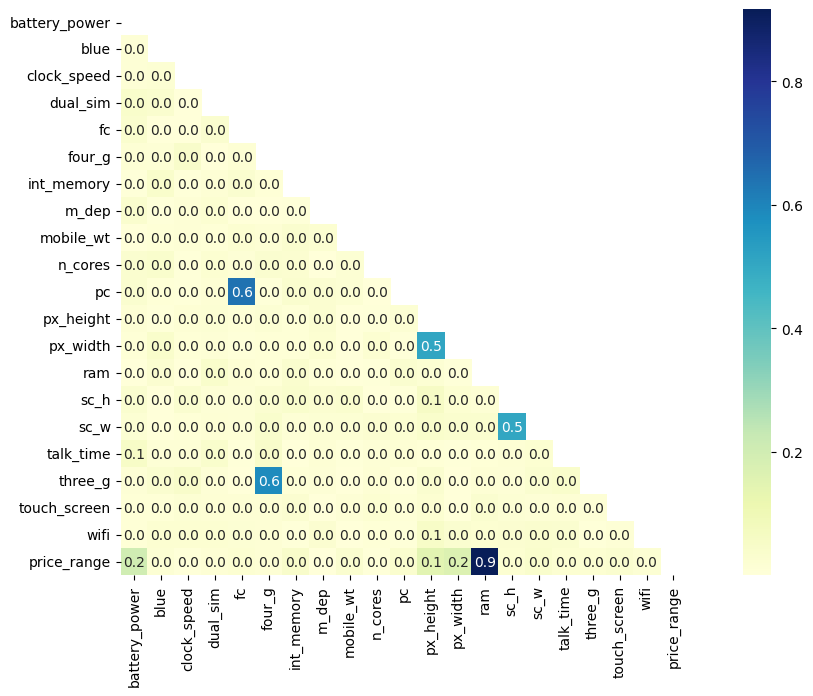

In [30]:
# Get the Pearson correlation matrix

corr_mat = df.corr(method='pearson')

# Print the first 5 rows of this matrix

# draw_line()
# print('First 5 rows of Pearson\'s correlation matrix:')
# draw_line()
# print(corr_mat.head())

# Plot the heatmap representation of the correlation matrix
plt.figure(figsize=(14.5, 7.5), dpi=100)
mask = np.triu(np.ones_like(corr_mat))
sns.heatmap(abs(corr_mat), mask=mask, annot=True, fmt="0.1f", \
            cmap='YlGnBu', square=True)
plt.show();

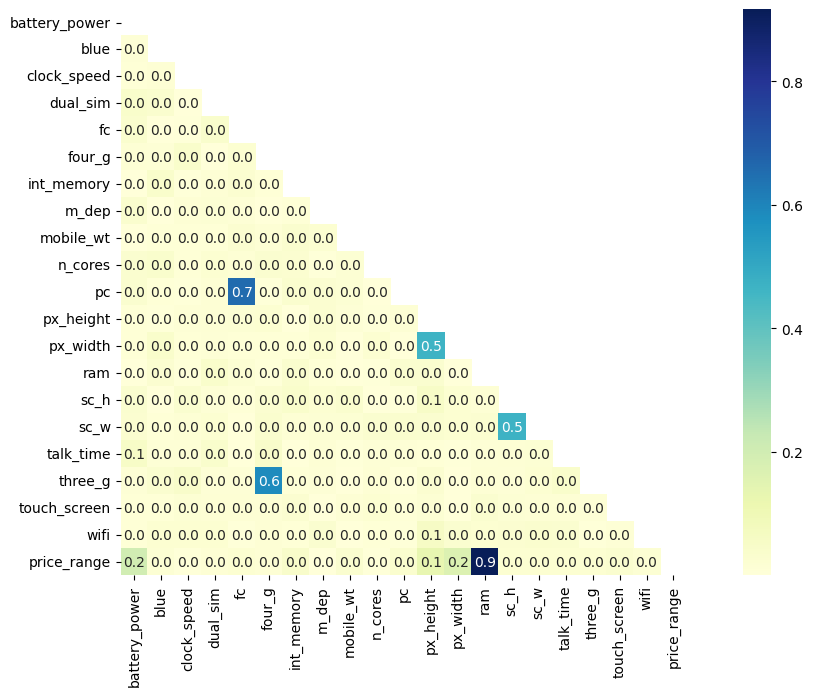

In [32]:
# Get the Spearman correlation matrix

corr_mat = df.corr(method='spearman')

# Print the first 5 rows of this matrix

# draw_line()
# print('First 5 rows of Spearman\'s correlation matrix:')
# draw_line()
# print(corr_mat.head())

# Plot the heatmap representation of the correlation matrix
plt.figure(figsize=(14.5, 7.5), dpi=100)
mask = np.triu(np.ones_like(corr_mat))
sns.heatmap(abs(corr_mat), mask=mask, annot=True, fmt="0.1f", \
            cmap='YlGnBu', square=True)
plt.show();

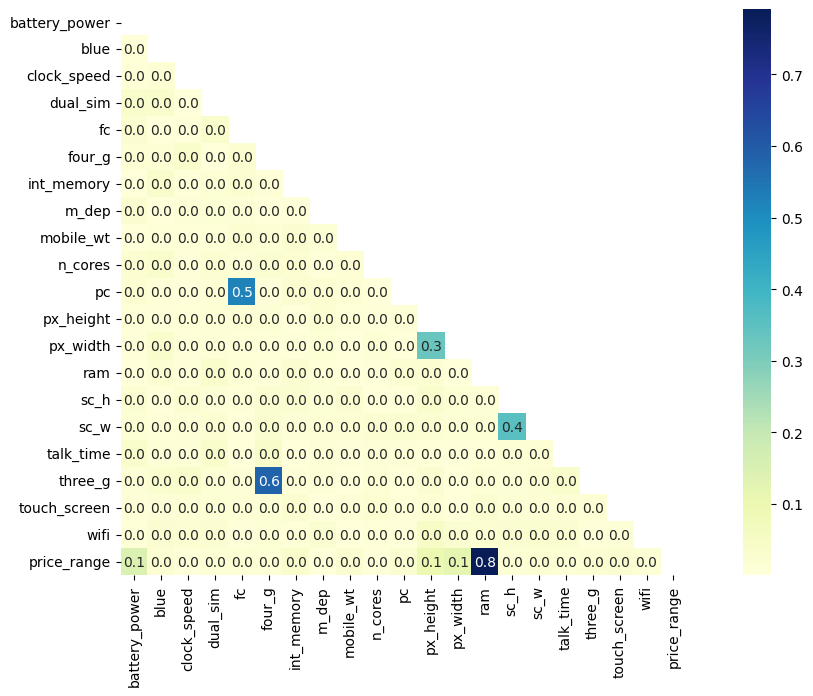

In [33]:
# Get the Kendall correlation matrix

corr_mat = df.corr(method='kendall')

# Print the first 5 rows of this matrix

# draw_line()
# print('First 5 rows of Kendall\'s correlation matrix:')
# draw_line()
# print(corr_mat.head())

# Plot the heatmap representation of the correlation matrix
plt.figure(figsize=(14.5, 7.5), dpi=100)
mask = np.triu(np.ones_like(corr_mat))
sns.heatmap(abs(corr_mat), mask=mask, annot=True, fmt="0.1f", \
            cmap='YlGnBu', square=True)
plt.show();